### Object Creation

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
# creating a Series by passing a list of values, letting pandas create a default index
s = pd.Series([1, 3, 5, np.nan, 6, 8])
s

0    1.0
1    3.0
2    5.0
3    NaN
4    6.0
5    8.0
dtype: float64

In [7]:
# create a DataFrame by passing a numpy array, with datetime index and labeled columns
dates = pd.date_range('20130101', periods = 6)
df = pd.DataFrame(np.random.randn(6, 4), index = dates, columns = list('ABCD'))
df

,A,B,C,D
2013-01-01,0.309928,-1.085700,1.476332,1.367429
2013-01-02,-0.446821,1.139740,-0.686726,0.127787
2013-01-03,-0.044658,-0.536210,0.313793,0.394922
2013-01-04,0.791224,0.828134,-0.278570,-1.916306
2013-01-05,0.247413,0.871047,0.494237,-0.006463
2013-01-06,0.800246,1.527389,0.473988,1.174292


In [10]:
# create a DataFrame by passing a dict of objects that can  be coverted to series-like
df2 = pd.DataFrame({'A' : 1.,
                   'B' : pd.Timestamp('20130102'),
                   'C' : pd.Series(1, index = list(range(4)), dtype = 'float32'),
                   'D' : np.array([3] * 4, dtype = 'int32'),
                   'E' : pd.Categorical(['test', 'train', 'test', 'train']),
                   'F' : 'foo'})
df2

,A,B,C,D,E,F
0,1.0,2013-01-02,1.0,3,test,foo
1,1.0,2013-01-02,1.0,3,train,foo
2,1.0,2013-01-02,1.0,3,test,foo
3,1.0,2013-01-02,1.0,3,train,foo


In [13]:
df2.dtypes

A           float64
B    datetime64[ns]
C           float32
D             int32
E          category
F            object
dtype: object

### Viewing Data

In [14]:
df.head()

,A,B,C,D
2013-01-01,0.309928,-1.085700,1.476332,1.367429
2013-01-02,-0.446821,1.139740,-0.686726,0.127787
2013-01-03,-0.044658,-0.536210,0.313793,0.394922
2013-01-04,0.791224,0.828134,-0.278570,-1.916306
2013-01-05,0.247413,0.871047,0.494237,-0.006463


In [15]:
df.tail(3)

,A,B,C,D
2013-01-04,0.791224,0.828134,-0.278570,-1.916306
2013-01-05,0.247413,0.871047,0.494237,-0.006463
2013-01-06,0.800246,1.527389,0.473988,1.174292


In [17]:
df.index

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')

In [18]:
df.columns

Index([u'A', u'B', u'C', u'D'], dtype='object')

In [19]:
df.values

array([[ 0.30992845, -1.08570044,  1.47633246,  1.36742944],
       [-0.44682104,  1.13974012, -0.68672558,  0.12778727],
       [-0.04465836, -0.53620991,  0.31379255,  0.39492174],
       [ 0.79122394,  0.82813384, -0.27856968, -1.91630553],
       [ 0.24741261,  0.87104725,  0.4942367 , -0.00646312],
       [ 0.80024624,  1.5273894 ,  0.47398821,  1.174292  ]])

In [21]:
# describe shows a quick statistic summary of the data
df.describe()

,A,B,C,D
count,6.000000,6.000000,6.000000,6.000000
mean,0.276222,0.457400,0.298842,0.190277
std,0.483229,1.028342,0.743009,1.172702
min,-0.446821,-1.085700,-0.686726,-1.916306
25%,0.028359,-0.195124,-0.130479,0.027099
50%,0.278671,0.849591,0.393890,0.261355
75%,0.670900,1.072567,0.489175,0.979449
max,0.800246,1.527389,1.476332,1.367429


In [22]:
# transposing data
df.T

,2013-01-01 00:00:00,2013-01-02 00:00:00,2013-01-03 00:00:00,2013-01-04 00:00:00,2013-01-05 00:00:00,2013-01-06 00:00:00
A,0.309928,-0.446821,-0.044658,0.791224,0.247413,0.800246
B,-1.085700,1.139740,-0.536210,0.828134,0.871047,1.527389
C,1.476332,-0.686726,0.313793,-0.278570,0.494237,0.473988
D,1.367429,0.127787,0.394922,-1.916306,-0.006463,1.174292


In [31]:
df.sort_index(axis = 1, ascending = False)

,D,C,B,A
2013-01-01,1.367429,1.476332,-1.085700,0.309928
2013-01-02,0.127787,-0.686726,1.139740,-0.446821
2013-01-03,0.394922,0.313793,-0.536210,-0.044658
2013-01-04,-1.916306,-0.278570,0.828134,0.791224
2013-01-05,-0.006463,0.494237,0.871047,0.247413
2013-01-06,1.174292,0.473988,1.527389,0.800246


In [32]:
df.sort_values(by = 'B')

,A,B,C,D
2013-01-01,0.309928,-1.085700,1.476332,1.367429
2013-01-03,-0.044658,-0.536210,0.313793,0.394922
2013-01-04,0.791224,0.828134,-0.278570,-1.916306
2013-01-05,0.247413,0.871047,0.494237,-0.006463
2013-01-02,-0.446821,1.139740,-0.686726,0.127787
2013-01-06,0.800246,1.527389,0.473988,1.174292


### Selection

In [33]:
# select a singlel column, which yields a Series, equivalent to df.A
df['A']

2013-01-01    0.309928
2013-01-02   -0.446821
2013-01-03   -0.044658
2013-01-04    0.791224
2013-01-05    0.247413
2013-01-06    0.800246
Freq: D, Name: A, dtype: float64

In [35]:
# slices the rows
df[0:3]

,A,B,C,D
2013-01-01,0.309928,-1.08570,1.476332,1.367429
2013-01-02,-0.446821,1.13974,-0.686726,0.127787
2013-01-03,-0.044658,-0.53621,0.313793,0.394922


In [36]:
df['20130102':'20130104']

,A,B,C,D
2013-01-02,-0.446821,1.139740,-0.686726,0.127787
2013-01-03,-0.044658,-0.536210,0.313793,0.394922
2013-01-04,0.791224,0.828134,-0.278570,-1.916306


In [37]:
# selection by label
df.loc[dates[0]]

A    0.309928
B   -1.085700
C    1.476332
D    1.367429
Name: 2013-01-01 00:00:00, dtype: float64

In [38]:
df.loc[:, ['A', 'B']]

,A,B
2013-01-01,0.309928,-1.085700
2013-01-02,-0.446821,1.139740
2013-01-03,-0.044658,-0.536210
2013-01-04,0.791224,0.828134
2013-01-05,0.247413,0.871047
2013-01-06,0.800246,1.527389


In [50]:
df.loc['20130102':'20130104', ['A', 'C']]

,A,C
2013-01-02,-0.446821,-0.686726
2013-01-03,-0.044658,0.313793
2013-01-04,0.791224,-0.278570


In [40]:
# getting a scalar value
df.loc[dates[0], 'A']

0.30992844603414427

In [41]:
df.at[dates[0], 'A']

0.30992844603414427

In [42]:
# selection by position
df.iloc[3]

A    0.791224
B    0.828134
C   -0.278570
D   -1.916306
Name: 2013-01-04 00:00:00, dtype: float64

In [43]:
df.iloc[3:5, 0:2]

,A,B
2013-01-04,0.791224,0.828134
2013-01-05,0.247413,0.871047


In [45]:
df.iloc[1:3, :]

,A,B,C,D
2013-01-02,-0.446821,1.13974,-0.686726,0.127787
2013-01-03,-0.044658,-0.53621,0.313793,0.394922


In [46]:
df.iloc[1, 1]

1.1397401181925708

In [48]:
# boolean indexing
df[df.A > 0]

,A,B,C,D
2013-01-01,0.309928,-1.085700,1.476332,1.367429
2013-01-04,0.791224,0.828134,-0.278570,-1.916306
2013-01-05,0.247413,0.871047,0.494237,-0.006463
2013-01-06,0.800246,1.527389,0.473988,1.174292


In [51]:
df[df > 0]

,A,B,C,D
2013-01-01,0.309928,NaN,1.476332,1.367429
2013-01-02,NaN,1.139740,NaN,0.127787
2013-01-03,NaN,NaN,0.313793,0.394922
2013-01-04,0.791224,0.828134,NaN,NaN
2013-01-05,0.247413,0.871047,0.494237,NaN
2013-01-06,0.800246,1.527389,0.473988,1.174292


In [56]:
# using isin() to filtering
df2 = df.copy()
df2['E'] = ['one', 'one', 'two', 'three', 'four', 'three']
df2

,A,B,C,D,E
2013-01-01,0.309928,-1.085700,1.476332,1.367429,one
2013-01-02,-0.446821,1.139740,-0.686726,0.127787,one
2013-01-03,-0.044658,-0.536210,0.313793,0.394922,two
2013-01-04,0.791224,0.828134,-0.278570,-1.916306,three
2013-01-05,0.247413,0.871047,0.494237,-0.006463,four
2013-01-06,0.800246,1.527389,0.473988,1.174292,three


In [57]:
df2[df2['E'].isin(['two', 'four'])]

,A,B,C,D,E
2013-01-03,-0.044658,-0.536210,0.313793,0.394922,two
2013-01-05,0.247413,0.871047,0.494237,-0.006463,four


### Setting

In [59]:
s1 = pd.Series([1, 2, 3, 4, 5, 6], index = pd.date_range('20130102', periods = 6))
s1

2013-01-02    1
2013-01-03    2
2013-01-04    3
2013-01-05    4
2013-01-06    5
2013-01-07    6
Freq: D, dtype: int64

In [60]:
df['F'] = s1
df

,A,B,C,D,F
2013-01-01,0.309928,-1.085700,1.476332,1.367429,NaN
2013-01-02,-0.446821,1.139740,-0.686726,0.127787,1.0
2013-01-03,-0.044658,-0.536210,0.313793,0.394922,2.0
2013-01-04,0.791224,0.828134,-0.278570,-1.916306,3.0
2013-01-05,0.247413,0.871047,0.494237,-0.006463,4.0
2013-01-06,0.800246,1.527389,0.473988,1.174292,5.0


In [66]:
# set values by label
df.loc[dates[0], 'A'] = 0
df.at[dates[0], 'B'] = 0
# set values by position
df.iat[0, 2] = 1
df

,A,B,C,D,F
2013-01-01,0.000000,0.000000,1.000000,1.367429,NaN
2013-01-02,-0.446821,1.139740,-0.686726,0.127787,1.0
2013-01-03,-0.044658,-0.536210,0.313793,0.394922,2.0
2013-01-04,0.791224,0.828134,-0.278570,-1.916306,3.0
2013-01-05,0.247413,0.871047,0.494237,-0.006463,4.0
2013-01-06,0.800246,1.527389,0.473988,1.174292,5.0


In [68]:
# setting by assigning with a numpy array
df.loc[:, 'D'] = np.array([5] * len(df))
df

,A,B,C,D,F
2013-01-01,0.000000,0.000000,1.000000,5,NaN
2013-01-02,-0.446821,1.139740,-0.686726,5,1.0
2013-01-03,-0.044658,-0.536210,0.313793,5,2.0
2013-01-04,0.791224,0.828134,-0.278570,5,3.0
2013-01-05,0.247413,0.871047,0.494237,5,4.0
2013-01-06,0.800246,1.527389,0.473988,5,5.0


In [71]:
# where operation with setting
df2 = df.copy()
df2[df2 > 0] = -df2
df2

,A,B,C,D,F
2013-01-01,0.000000,0.000000,-1.000000,-5,NaN
2013-01-02,-0.446821,-1.139740,-0.686726,-5,-1.0
2013-01-03,-0.044658,-0.536210,-0.313793,-5,-2.0
2013-01-04,-0.791224,-0.828134,-0.278570,-5,-3.0
2013-01-05,-0.247413,-0.871047,-0.494237,-5,-4.0
2013-01-06,-0.800246,-1.527389,-0.473988,-5,-5.0


### Missing Data

In [72]:
df1 = df.reindex(index = dates[0:4], columns = list(df.columns) + ['E'])
df1.loc[dates[0]:dates[1], 'E'] = 1
df1

,A,B,C,D,F,E
2013-01-01,0.000000,0.000000,1.000000,5,NaN,1.0
2013-01-02,-0.446821,1.139740,-0.686726,5,1.0,1.0
2013-01-03,-0.044658,-0.536210,0.313793,5,2.0,NaN
2013-01-04,0.791224,0.828134,-0.278570,5,3.0,NaN


In [73]:
# drop any rows that have missing data
df1.dropna(how = 'any')

,A,B,C,D,F,E
2013-01-02,-0.446821,1.13974,-0.686726,5,1.0,1.0


In [75]:
# filling missing data
df1.fillna(value = 5)

,A,B,C,D,F,E
2013-01-01,0.000000,0.000000,1.000000,5,5.0,1.0
2013-01-02,-0.446821,1.139740,-0.686726,5,1.0,1.0
2013-01-03,-0.044658,-0.536210,0.313793,5,2.0,5.0
2013-01-04,0.791224,0.828134,-0.278570,5,3.0,5.0


In [76]:
# get boolean mask where values are nan
pd.isnull(df1)

,A,B,C,D,F,E
2013-01-01,False,False,False,False,True,False
2013-01-02,False,False,False,False,False,False
2013-01-03,False,False,False,False,False,True
2013-01-04,False,False,False,False,False,True


### Operations

In [77]:
df

,A,B,C,D,F
2013-01-01,0.000000,0.000000,1.000000,5,NaN
2013-01-02,-0.446821,1.139740,-0.686726,5,1.0
2013-01-03,-0.044658,-0.536210,0.313793,5,2.0
2013-01-04,0.791224,0.828134,-0.278570,5,3.0
2013-01-05,0.247413,0.871047,0.494237,5,4.0
2013-01-06,0.800246,1.527389,0.473988,5,5.0


In [78]:
df.mean()

A    0.224567
B    0.638350
C    0.219454
D    5.000000
F    3.000000
dtype: float64

In [79]:
df.mean(1)

2013-01-01    1.500000
2013-01-02    1.201239
2013-01-03    1.346585
2013-01-04    1.868158
2013-01-05    2.122539
2013-01-06    2.560325
Freq: D, dtype: float64

In [83]:
s = pd.Series([1, 3, 5, np.nan, 6, 8], index = dates).shift(2)
s

2013-01-01    NaN
2013-01-02    NaN
2013-01-03    1.0
2013-01-04    3.0
2013-01-05    5.0
2013-01-06    NaN
Freq: D, dtype: float64

In [84]:
df.sub(s, axis = 'index')

,A,B,C,D,F
2013-01-01,NaN,NaN,NaN,NaN,NaN
2013-01-02,NaN,NaN,NaN,NaN,NaN
2013-01-03,-1.044658,-1.536210,-0.686207,4.0,1.0
2013-01-04,-2.208776,-2.171866,-3.278570,2.0,0.0
2013-01-05,-4.752587,-4.128953,-4.505763,0.0,-1.0
2013-01-06,NaN,NaN,NaN,NaN,NaN


In [86]:
# applying functions to the data
df.apply(np.cumsum)

,A,B,C,D,F
2013-01-01,0.000000,0.000000,1.000000,5,NaN
2013-01-02,-0.446821,1.139740,0.313274,10,1.0
2013-01-03,-0.491479,0.603530,0.627067,15,3.0
2013-01-04,0.299745,1.431664,0.348497,20,6.0
2013-01-05,0.547157,2.302711,0.842734,25,10.0
2013-01-06,1.347403,3.830101,1.316722,30,15.0


In [87]:
df.apply(lambda x : x.max() - x.min())

A    1.247067
B    2.063599
C    1.686726
D    0.000000
F    4.000000
dtype: float64

In [89]:
# histogramming
s = pd.Series(np.random.randint(0, 7, size = 10))
s

0    5
1    4
2    1
3    0
4    1
5    6
6    1
7    4
8    0
9    4
dtype: int32

In [95]:
s.value_counts()

4    3
1    3
0    2
6    1
5    1
dtype: int64

In [92]:
s.value_counts().sort_index()

0    2
1    3
4    3
5    1
6    1
dtype: int64

In [94]:
s.value_counts().sort_values(ascending = False)

1    3
4    3
0    2
5    1
6    1
dtype: int64

In [97]:
# String methods
s = pd.Series(['A', 'B', 'C', 'Aaba', 'Baca', np.nan, 'CABA', 'dog', 'cat'])
s.str.lower()

0       a
1       b
2       c
3    aaba
4    baca
5     NaN
6    caba
7     dog
8     cat
dtype: object

### Merge

In [99]:
# concat
df = pd.DataFrame(np.random.randn(10, 4))
df

,0,1,2,3
0,0.482485,0.301224,0.187591,0.867628
1,0.806945,0.606749,-0.364587,1.306129
2,0.531504,-0.368137,-1.691385,-0.800280
3,-0.445375,1.529584,-1.118532,0.172934
4,-0.787516,0.376864,-0.142693,0.630727
5,-0.239397,0.405431,1.088364,0.200144
6,-1.552565,0.246683,-0.080563,-0.985767
7,0.816234,-0.602158,0.434439,-0.544081
8,0.525733,0.419632,-0.459311,1.154481
9,0.652783,0.354755,-0.009862,1.790391


In [103]:
pieces = [df[:3], df[4:7], df[8:]]
pd.concat(pieces)

,0,1,2,3
0,0.482485,0.301224,0.187591,0.867628
1,0.806945,0.606749,-0.364587,1.306129
2,0.531504,-0.368137,-1.691385,-0.800280
4,-0.787516,0.376864,-0.142693,0.630727
5,-0.239397,0.405431,1.088364,0.200144
6,-1.552565,0.246683,-0.080563,-0.985767
8,0.525733,0.419632,-0.459311,1.154481
9,0.652783,0.354755,-0.009862,1.790391


In [106]:
# join
left = pd.DataFrame({'key': ['foo', 'foo'], 'lval': [1, 2]})
left

,key,lval
0,foo,1
1,foo,2


In [105]:
right = pd.DataFrame({'key': ['foo', 'foo'], 'rval': [4, 5]})
right

,key,rval
0,foo,4
1,foo,5


In [107]:
pd.merge(left, right, on = 'key')

,key,lval,rval
0,foo,1,4
1,foo,1,5
2,foo,2,4
3,foo,2,5


In [108]:
left = pd.DataFrame({'key': ['foo', 'bar'], 'lval': [1, 2]})
left

,key,lval
0,foo,1
1,bar,2


In [109]:
right = pd.DataFrame({'key': ['foo', 'bar'], 'rval': [4, 5]})
right

,key,rval
0,foo,4
1,bar,5


In [110]:
pd.merge(left, right, on = 'key')

,key,lval,rval
0,foo,1,4
1,bar,2,5


In [111]:
# append
df = pd.DataFrame(np.random.randn(8, 4), columns = ['A', 'B', 'C', 'D'])
df

,A,B,C,D
0,2.328457,-1.431420,0.271287,2.027765
1,-0.732371,-1.412701,0.663152,1.420709
2,-0.263070,-0.698877,1.885235,-2.719582
3,-0.454645,-1.394264,0.779427,-0.016264
4,0.360190,-0.624092,0.473002,1.059646
5,0.074758,0.195643,-1.225514,0.741250
6,0.583820,-0.518404,1.289719,-0.315351
7,0.230349,0.115805,-1.878699,0.644894


In [122]:
s = df.iloc[3]
s

A   -0.454645
B   -1.394264
C    0.779427
D   -0.016264
Name: 3, dtype: float64

In [123]:
df.append(s, ignore_index = True)

,A,B,C,D
0,2.328457,-1.431420,0.271287,2.027765
1,-0.732371,-1.412701,0.663152,1.420709
2,-0.263070,-0.698877,1.885235,-2.719582
3,-0.454645,-1.394264,0.779427,-0.016264
4,0.360190,-0.624092,0.473002,1.059646
5,0.074758,0.195643,-1.225514,0.741250
6,0.583820,-0.518404,1.289719,-0.315351
7,0.230349,0.115805,-1.878699,0.644894
8,-0.454645,-1.394264,0.779427,-0.016264


In [127]:
s = df[:3]
df.append(s, ignore_index = True)

,A,B,C,D
0,2.328457,-1.431420,0.271287,2.027765
1,-0.732371,-1.412701,0.663152,1.420709
2,-0.263070,-0.698877,1.885235,-2.719582
3,-0.454645,-1.394264,0.779427,-0.016264
4,0.360190,-0.624092,0.473002,1.059646
5,0.074758,0.195643,-1.225514,0.741250
6,0.583820,-0.518404,1.289719,-0.315351
7,0.230349,0.115805,-1.878699,0.644894
8,2.328457,-1.431420,0.271287,2.027765
9,-0.732371,-1.412701,0.663152,1.420709


### Grouping

In [129]:
df = pd.DataFrame({'A' : ['foo', 'bar', 'foo', 'bar', 'foo', 'bar', 'foo', 'bar'],
                   'B' : ['one', 'one', 'two', 'three', 'two', 'two', 'one', 'three'],
                   'C' : np.random.randn(8),
                   'D' : np.random.randn(8)})
df

,A,B,C,D
0,foo,one,-0.245778,-0.500627
1,bar,one,-0.029481,0.113265
2,foo,two,-0.759672,-0.551837
3,bar,three,0.080791,0.399109
4,foo,two,-0.386770,0.294165
5,bar,two,-0.485530,-0.279335
6,foo,one,-0.275847,0.043967
7,bar,three,0.083257,-0.560301


In [130]:
df.groupby('A').sum()

,C,D
A,,
bar,-0.350964,-0.327262
foo,-1.668067,-0.714332


In [131]:
df.groupby(['A', 'B']).sum()

C         D
A   B                        
bar one   -0.029481  0.113265
    three  0.164047 -0.161192
    two   -0.485530 -0.279335
foo one   -0.521624 -0.456660
    two   -1.146442 -0.257672

In [132]:
df.groupby(['B', 'A']).sum()

C         D
B     A                      
one   bar -0.029481  0.113265
      foo -0.521624 -0.456660
three bar  0.164047 -0.161192
two   bar -0.485530 -0.279335
      foo -1.146442 -0.257672

### Reshaping

In [136]:
# stack
tuples = list(zip(*[['bar', 'bar', 'baz', 'baz','foo', 'foo', 'qux', 'qux'],
                   ['one', 'two', 'one', 'two', 'one', 'two', 'one', 'two']]))
index = pd.MultiIndex.from_tuples(tuples, names = ['first', 'second'])
df = pd.DataFrame(np.random.randn(8, 2), index = index, columns = ['A', 'B'])
df

A         B
first second                    
bar   one    -2.590666 -1.226018
      two     0.360771 -0.952665
baz   one    -0.501955  0.949876
      two    -0.345985 -0.575735
foo   one     0.030734 -0.783911
      two    -0.521336  0.919616
qux   one     2.238411  0.460308
      two    -0.184936  0.834159

In [137]:
df2 = df[:4]
df2

A         B
first second                    
bar   one    -2.590666 -1.226018
      two     0.360771 -0.952665
baz   one    -0.501955  0.949876
      two    -0.345985 -0.575735

In [139]:
stacked = df2.stack()
stacked

first  second   
bar    one     A   -2.590666
               B   -1.226018
       two     A    0.360771
               B   -0.952665
baz    one     A   -0.501955
               B    0.949876
       two     A   -0.345985
               B   -0.575735
dtype: float64

In [140]:
stacked.unstack()

A         B
first second                    
bar   one    -2.590666 -1.226018
      two     0.360771 -0.952665
baz   one    -0.501955  0.949876
      two    -0.345985 -0.575735

In [141]:
stacked.unstack(1)

second        one       two
first                      
bar   A -2.590666  0.360771
      B -1.226018 -0.952665
baz   A -0.501955 -0.345985
      B  0.949876 -0.575735

In [142]:
stacked.unstack(0)

first          bar       baz
second                      
one    A -2.590666 -0.501955
       B -1.226018  0.949876
two    A  0.360771 -0.345985
       B -0.952665 -0.575735

In [143]:
# pivot tables
df = pd.DataFrame({
    'A' : ['one', 'one', 'two',  'three'] * 3,
    'B' : ['A', 'B', 'C'] *  4,
    'C' : ['foo', 'foo', 'foo', 'bar',  'bar', 'bar'] * 2,
    'D' : np.random.randn(12),
    'E' : np.random.randn(12)
})
df

,A,B,C,D,E
0,one,A,foo,0.725125,0.935682
1,one,B,foo,1.277845,0.221437
2,two,C,foo,2.231020,-1.415761
3,three,A,bar,-1.414531,-1.121773
4,one,B,bar,0.480001,0.937082
5,one,C,bar,-1.026727,-1.423679
6,two,A,foo,-0.733497,-0.576246
7,three,B,foo,-0.323621,-0.710024
8,one,C,foo,-0.934731,-0.000901
9,one,A,bar,1.014827,0.062923


In [144]:
pd.pivot_table(df, values = 'D', index = ['A', 'B'], columns = ['C'])

C             bar       foo
A     B                    
one   A  1.014827  0.725125
      B  0.480001  1.277845
      C -1.026727 -0.934731
three A -1.414531       NaN
      B       NaN -0.323621
      C -0.149741       NaN
two   A       NaN -0.733497
      B  0.400684       NaN
      C       NaN  2.231020

### Time Series

In [148]:
rng = pd.date_range('1/1/2012', periods = 100, freq = 'S')
ts = pd.Series(np.random.randint(0, 500, len(rng)), index = rng)
ts[-5:]

2012-01-01 00:01:35    495
2012-01-01 00:01:36    142
2012-01-01 00:01:37     48
2012-01-01 00:01:38     82
2012-01-01 00:01:39     77
Freq: S, dtype: int32

In [154]:
ts.resample('1Min').sum()

2012-01-01 00:00:00    15300
2012-01-01 00:01:00    10711
Freq: T, dtype: int32

In [155]:
# time zone representation
rng = pd.date_range('3/6/2012 00:00', periods = 5, freq = 'D')
ts = pd.Series(np.random.randn(len(rng)), rng)
ts

2012-03-06   -1.261450
2012-03-07   -1.055655
2012-03-08   -1.413412
2012-03-09   -1.025226
2012-03-10   -1.457434
Freq: D, dtype: float64

In [156]:
ts_utc = ts.tz_localize('UTC')
ts_utc

2012-03-06 00:00:00+00:00   -1.261450
2012-03-07 00:00:00+00:00   -1.055655
2012-03-08 00:00:00+00:00   -1.413412
2012-03-09 00:00:00+00:00   -1.025226
2012-03-10 00:00:00+00:00   -1.457434
Freq: D, dtype: float64

In [157]:
# convert to another time zone
ts_utc.tz_convert('US/Eastern')

2012-03-05 19:00:00-05:00   -1.261450
2012-03-06 19:00:00-05:00   -1.055655
2012-03-07 19:00:00-05:00   -1.413412
2012-03-08 19:00:00-05:00   -1.025226
2012-03-09 19:00:00-05:00   -1.457434
Freq: D, dtype: float64

In [158]:
# convert between time span representation
rng = pd.date_range('1/1/2012', periods = 5, freq = 'M')
ts = pd.Series(np.random.randn(len(rng)), index = rng)
ts

2012-01-31   -0.211081
2012-02-29   -0.494474
2012-03-31    0.206498
2012-04-30   -0.174031
2012-05-31    0.687106
Freq: M, dtype: float64

In [159]:
ps = ts.to_period()
ps

2012-01   -0.211081
2012-02   -0.494474
2012-03    0.206498
2012-04   -0.174031
2012-05    0.687106
Freq: M, dtype: float64

In [160]:
ps.to_timestamp()

2012-01-01   -0.211081
2012-02-01   -0.494474
2012-03-01    0.206498
2012-04-01   -0.174031
2012-05-01    0.687106
Freq: MS, dtype: float64

In [162]:
prng = pd.period_range('1990Q1', '2000Q4', freq = 'Q-NOV')
ts = pd.Series(np.random.randn(len(prng)), prng)
ts.head()

1990Q1    1.090473
1990Q2   -0.513122
1990Q3    0.769091
1990Q4    0.965375
1991Q1    1.105439
Freq: Q-NOV, dtype: float64

In [163]:
ts.index = (prng.asfreq('M', 'e') + 1).asfreq('H', 's') + 9
ts.head()

1990-03-01 09:00    1.090473
1990-06-01 09:00   -0.513122
1990-09-01 09:00    0.769091
1990-12-01 09:00    0.965375
1991-03-01 09:00    1.105439
Freq: H, dtype: float64

### Categorical

In [172]:
df = pd.DataFrame({
    "id" : [1, 2, 3, 4, 5, 6],
    "raw_grade" : ['a', 'b', 'b', 'a', 'a', 'e']
})
df

,id,raw_grade
0,1,a
1,2,b
2,3,b
3,4,a
4,5,a
5,6,e


In [173]:
df["grade"] = df["raw_grade"].astype("category")
df["grade"]

0    a
1    b
2    b
3    a
4    a
5    e
Name: grade, dtype: category
Categories (3, object): [a, b, e]

In [174]:
df["grade"].cat.categories = ["very good", "good", "very bad" ]
df

,id,raw_grade,grade
0,1,a,very good
1,2,b,good
2,3,b,good
3,4,a,very good
4,5,a,very good
5,6,e,very bad


In [175]:
df["grade"] = df["grade"].cat.set_categories([
    "very bad", "bad", "medium", "good", "very good"
])
df["grade"]

0    very good
1         good
2         good
3    very good
4    very good
5     very bad
Name: grade, dtype: category
Categories (5, object): [very bad, bad, medium, good, very good]

In [177]:
df.groupby("grade").size()

grade
very bad     1
bad          0
medium       0
good         2
very good    3
dtype: int64

### Ploting

In [179]:
%matplotlib inline

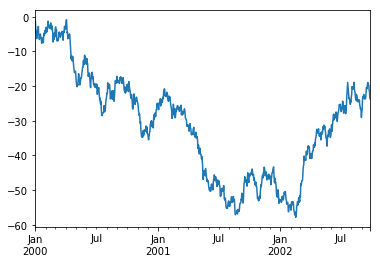

In [182]:
ts = pd.Series(np.random.randn(1000), index = pd.date_range('1/1/2000', periods = 1000))
ts = ts.cumsum()
ts.plot()

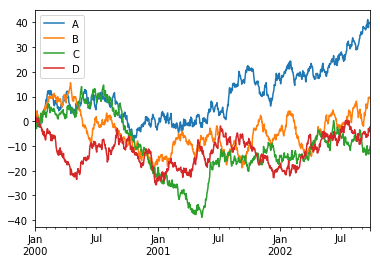

In [187]:
df = pd.DataFrame(np.random.randn(1000, 4), index = ts.index, columns = ['A', 'B', 'C', 'D'])
df = df.cumsum()
plt.figure(); 
df.plot(); 
plt.legend(loc = 'best')